# **Clustering**

## **Imports**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

## **Load the dataset and pre processing**

In [2]:
df = pd.read_csv("summary_df_combined_1.csv")

In [ ]:
# Drop the first column
df = df.drop(df.columns[0], axis=1)

In [ ]:
# Move the average reward column to the end to be the target column
cols = [col for col in df.columns if col != "Average Reward"] + ["Average Reward"]
df = df[cols]

In [8]:
df

,Number of Lanes,Number of Vehicles,Vehicles Density,Reward Speed Range,Scaling Factor,Algorithm,Reward Standard Deviation,Observation Variance,Action Variance,Number of Transitions Observed,...,Average On Road Reward,Average Episode Length,Reward Sparsity,Transition Rewards Variance,Observation Type,Maximum Range (Lidar),Horizon (TimeToCollision),Initial Lane Id,Ego Spacing,Average Reward
0,4,50,1.0,0,5.5,2,0.075884,6.111606,0.005758,5416,...,1.0,60,1.000000,0.005758,0,0,0,3,2.0,0.754729
1,4,40,1.0,0,5.5,2,0.089004,9.313594,0.007922,3637,...,1.0,40,0.999175,0.007922,0,0,0,3,2.0,0.765053
2,4,50,1.0,0,5.5,2,0.086899,7.936457,0.007551,3627,...,1.0,38,1.000000,0.007551,0,0,0,3,2.0,0.760916
3,4,25,1.0,0,5.5,2,0.094445,10.303575,0.008920,3727,...,1.0,40,0.999732,0.008920,0,0,0,3,2.0,0.766873
4,4,50,1.0,0,5.5,2,0.091617,9.970945,0.008394,4278,...,1.0,45,0.999065,0.008394,0,0,0,3,2.0,0.762661
5,4,30,1.0,0,5.5,2,0.083105,7.675548,0.006906,3814,...,1.0,40,0.999476,0.006906,0,0,0,3,2.0,0.750377
6,4,50,1.0,0,5.5,2,0.075456,7.161883,0.005694,5045,...,1.0,53,0.999604,0.005694,0,0,0,3,2.0,0.759000
7,4,35,1.0,0,5.5,2,0.080824,8.266295,0.006533,3795,...,1.0,40,0.999209,0.006533,0,0,0,3,2.0,0.766752
8,4,50,1.0,0,5.5,0,0.142239,9.616851,0.020232,2175,...,1.0,40,1.000000,0.020232,0,0,0,3,2.0,0.787108
9,8,30,1.5,2,5.5,1,0.043973,0.924906,0.001934,5286,...,1.0,60,0.999622,0.001934,0,0,0,3,2.0,0.697054


In [9]:
df.to_csv("general_dataset.csv")

## **PCA**

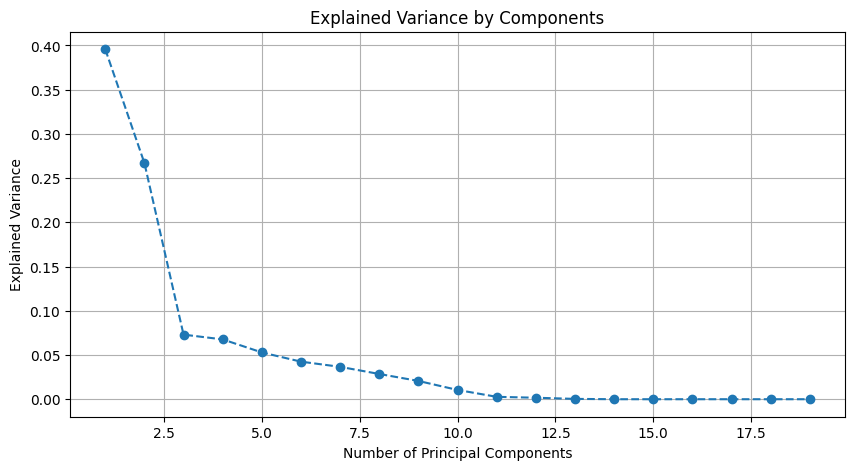

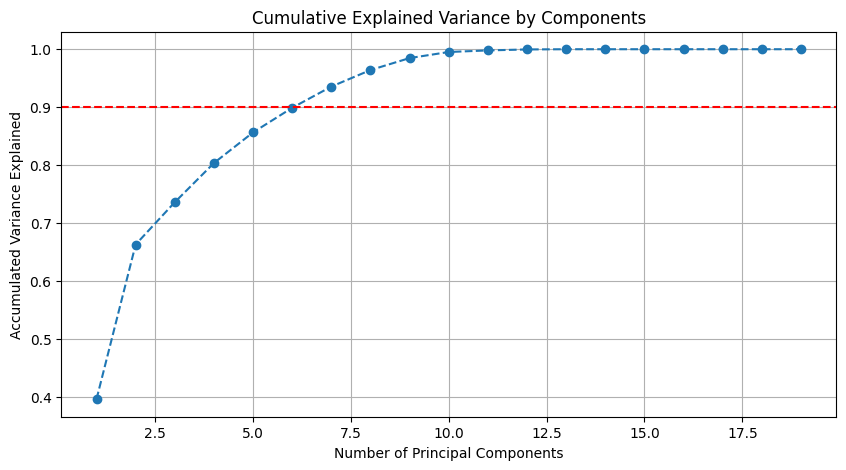

Number of components for 90% variance: 7


In [ ]:
# Select the features to be used in PCA
features = df[['Number of Lanes', 'Number of Vehicles', 'Vehicles Density', 
                 'Reward Speed Range', 'Scaling Factor', 'Algorithm', 
                 'Reward Standard Deviation', 'Observation Variance', 
                 'Action Variance', 'Number of Transitions Observed', 
                 'Average On Road Reward', 'Average Episode Length', 
                 'Reward Sparsity', 'Transition Rewards Variance', 
                 'Observation Type', 'Maximum Range (Lidar)', 
                 'Horizon (TimeToCollision)', 'Initial Lane Id', 
                 'Ego Spacing']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

# Get the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--')  #  90% explained variance
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accumulated Variance Explained')
plt.grid()
plt.show()

# Get the number of components for 90% variance
n_components = np.where(cumulative_variance >= 0.90)[0][0] + 1  
print(f"Number of components for 90% variance: {n_components}")

# Apply PCA with the number of components for 90% variance
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(n_components)])
pca_df['Average Reward'] = df['Average Reward'].values  

In [24]:
pca_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Average Reward
0,-1.708643,0.188979,0.327975,-0.316093,-1.503619,2.103191,0.178161,0.754729
1,-0.790061,1.072183,-0.029168,0.432364,-0.390504,-0.067240,-0.664427,0.765053
2,-0.907027,1.489307,-0.016045,0.512952,-0.180079,-0.161226,0.221208,0.760916
3,-0.693945,0.527329,-0.128367,0.435073,-0.517010,-0.116216,-1.941581,0.766873
4,-0.929857,1.301400,0.188809,0.172550,-0.786715,0.535327,-0.007052,0.762661
5,-1.010857,0.506669,-0.187487,0.492618,-0.351147,-0.004509,-1.356170,0.750377
6,-1.547943,0.631181,0.227243,-0.073534,-1.153989,1.435539,0.129946,0.759000
7,-1.009310,0.758544,-0.123850,0.467758,-0.369455,-0.011845,-0.998622,0.766752
8,0.995316,0.712294,0.769905,-0.319556,-0.923668,-0.974758,1.594021,0.787108
9,-1.947792,-3.253384,1.553699,-0.645608,0.205850,1.289187,-0.615770,0.697054


In [25]:
pca_df.to_csv("pca_dataset.csv")